In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline

# Getting acquainted with data

In [2]:
path = r'C:\Users\user\Downloads\skychallenge_data\data\skychallenge_car_data.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Unnamed: 0,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [4]:
data.keys()

Index(['Unnamed: 0', 'city', 'price', 'year', 'manufacturer', 'make',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'lat',
       'long', 'county_fips', 'county_name', 'state_fips', 'state_code',
       'state_name', 'weather'],
      dtype='object')

In [5]:
#droping all not important columns
data = data.drop(['Unnamed: 0','city', 'vin', 'paint_color', 'lat', 'long', 'county_fips', 'county_name', 'state_fips', 'state_code',
       'state_name', 'weather'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 13 columns):
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
drive           object
size            object
type            object
dtypes: float64(2), int64(1), object(10)
memory usage: 170.9+ MB


In [7]:
data.nunique()

price            30349
year               126
manufacturer        53
make            107445
condition            6
cylinders            8
fuel                 5
odometer        172208
title_status         6
transmission         3
drive                3
size                 4
type                13
dtype: int64

In [8]:
missing_values = data.isnull().sum()
print(missing_values)
print(data.shape)

price                 0
year               6315
manufacturer     136414
make              69699
condition        700790
cylinders        691291
fuel              10367
odometer         564054
title_status       2554
transmission       9022
drive            661884
size            1123967
type             702931
dtype: int64
(1723065, 13)


In [9]:
print(data.describe())
print(data.describe(include=['object']))

              price          year      odometer
count  1.723065e+06  1.716750e+06  1.159011e+06
mean   1.075540e+05  2.004841e+03  1.136387e+05
std    1.004439e+07  1.208772e+01  1.368603e+05
min    1.000000e+00  3.020000e+02  0.000000e+00
25%    3.295000e+03  2.002000e+03  5.800000e+04
50%    7.000000e+03  2.007000e+03  1.070000e+05
75%    1.499900e+04  2.012000e+03  1.520000e+05
max    2.068627e+09  2.019000e+03  1.000000e+07
       manufacturer     make  condition    cylinders     fuel title_status  \
count       1586651  1653366    1022275      1031774  1712698      1720511   
unique           53   107445          6            8        5            6   
top            ford     1500  excellent  6 cylinders      gas        clean   
freq         292841    23346     443538       362142  1531426      1601315   

       transmission    drive       size     type  
count       1714043  1061181     599098  1020134  
unique            3        3          4       13  
top       automatic     

In [10]:
#for each column count unique values
for i in range(1,int(len(data.keys()))):
    print('\n')
    print(data[data.keys()[i]].value_counts())



2007.0    108117
2008.0    103466
2006.0    101390
2015.0     94124
2005.0     92328
           ...  
302.0          1
1813.0         1
1904.0         1
1907.0         1
718.0          1
Name: year, Length: 126, dtype: int64


ford               292841
chevrolet          219801
toyota             116737
honda               89608
nissan              79994
dodge               76216
jeep                75039
gmc                 69964
ram                 56892
bmw                 43406
chevy               40743
volkswagen          33617
hyundai             33363
chrysler            31540
subaru              29555
cadillac            25214
kia                 25030
mercedes-benz       24075
mazda               23492
buick               22890
pontiac             22365
lexus               20424
acura               18140
audi                15188
lincoln             12876
infiniti            12104
volvo               11264
mitsubishi          11003
mercury             10301
saturn           

# Data preparation

In [11]:
data2 = data.copy()

In [12]:
#replacing 0 values with NaN
data2.replace(0.0, np.nan, inplace=True)
data2.isnull().sum()

price                 0
year               6315
manufacturer     136414
make              69699
condition        700790
cylinders        691291
fuel              10367
odometer         569514
title_status       2554
transmission       9022
drive            661884
size            1123967
type             702931
dtype: int64

In [13]:
data2.describe()

,price,year,odometer
count,1.723065e+06,1.716750e+06,1.153551e+06
mean,1.075540e+05,2.004841e+03,1.141765e+05
std,1.004439e+07,1.208772e+01,1.369598e+05
min,1.000000e+00,3.020000e+02,1.000000e+00
25%,3.295000e+03,2.002000e+03,5.899700e+04
50%,7.000000e+03,2.007000e+03,1.071610e+05
75%,1.499900e+04,2.012000e+03,1.522630e+05
max,2.068627e+09,2.019000e+03,1.000000e+07


In [14]:
# Taking cars created after 1950, that cost less than 100k and with odometer less than 500k
data2 = data.copy()
data2 = data2[(data.price < 100000)]
data2 = data2[(data.year > 1950)]
data2 = data2[(data.odometer < 500000)]
data2.describe()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,price,year,odometer
count,1.146341e+06,1.146341e+06,1.146341e+06
mean,1.221042e+04,2.007382e+03,1.090794e+05
std,1.104593e+04,8.223266e+00,6.560253e+04
min,1.000000e+00,1.951000e+03,0.000000e+00
25%,4.200000e+03,2.004000e+03,5.820000e+04
50%,8.900000e+03,2.008000e+03,1.070000e+05
75%,1.698700e+04,2.013000e+03,1.518350e+05
max,9.999900e+04,2.019000e+03,4.999980e+05


In [15]:
data2.isnull().sum()

price                0
year                 0
manufacturer     58232
make             24309
condition       371881
cylinders       336310
fuel              8535
odometer             0
title_status      1222
transmission      6989
drive           286863
size            669771
type            298147
dtype: int64

In [16]:
# drop all rows with at least one NaN value
data3 = data2.dropna()

In [17]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357022 entries, 3 to 1723064
Data columns (total 13 columns):
price           357022 non-null int64
year            357022 non-null float64
manufacturer    357022 non-null object
make            357022 non-null object
condition       357022 non-null object
cylinders       357022 non-null object
fuel            357022 non-null object
odometer        357022 non-null float64
title_status    357022 non-null object
transmission    357022 non-null object
drive           357022 non-null object
size            357022 non-null object
type            357022 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 38.1+ MB


In [18]:
data3['manufacturer'].unique()

array(['ford', 'jeep', 'chev', 'chevrolet', 'hyundai', 'cadillac',
       'rover', 'chevy', 'infiniti', 'honda', 'kia', 'gmc', 'lincoln',
       'mitsubishi', 'buick', 'lexus', 'toyota', 'acura', 'nissan',
       'dodge', 'volkswagen', 'mercury', 'fiat', 'mazda', 'subaru', 'ram',
       'mercedes', 'audi', 'bmw', 'chrysler', 'pontiac', 'volvo', 'vw',
       'jaguar', 'mercedes-benz', 'saturn', 'infinity', 'mini', 'alfa',
       'datsun', 'ferrari', 'landrover', 'land rover', 'harley', 'porche',
       'aston-martin', 'harley-davidson', 'alfa-romeo', 'mercedesbenz',
       'aston', 'morgan'], dtype=object)

In [19]:
# dealing with duplicate manufacturers

data3.loc[data3['manufacturer'] == 'chev', 'manufacturer'] = 'chevrolet'
data3.loc[data3['manufacturer'] == 'vw', 'manufacturer'] = 'volkswagen'
data3.loc[data3['manufacturer'] == 'alfa', 'manufacturer'] = 'alfa romeo'
data3.loc[data3['manufacturer'] == 'alfa-romeo', 'manufacturer'] = 'alfa romeo'
data3.loc[data3['manufacturer'] == 'mercedesbenz', 'manufacturer'] = 'mercedes'
data3.loc[data3['manufacturer'] == 'mercedes-benz', 'manufacturer'] = 'mercedes'
data3.loc[data3['manufacturer'] == 'aston-martin', 'manufacturer'] = 'aston'
data3.loc[data3['manufacturer'] == 'aston', 'manufacturer'] = 'aston martin'
data3.loc[data3['manufacturer'] == 'chevy', 'manufacturer'] = 'chevrolet'
data3.loc[data3['manufacturer'] == 'chev', 'manufacturer'] = 'chevrolet'
data3.loc[data3['manufacturer'] == 'landrover', 'manufacturer'] = 'land rover'
data3.loc[data3['manufacturer'] == 'harley-davidson', 'manufacturer'] = 'harley davidson'
data3.loc[data3['manufacturer'] == 'harley', 'manufacturer'] = 'harley davidson'



data3['manufacturer'].value_counts()

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


ford               67501
chevrolet          57222
toyota             27977
honda              20165
nissan             17640
dodge              16314
gmc                15796
jeep               14532
ram                12234
bmw                 9886
volkswagen          8002
hyundai             7651
mercedes            7541
chrysler            7169
subaru              6512
kia                 5701
cadillac            5658
buick               5656
mazda               5498
lexus               5083
pontiac             5016
acura               3535
audi                3415
lincoln             3385
volvo               2797
mercury             2787
infiniti            2690
mitsubishi          2612
saturn              2390
mini                1585
jaguar              1149
rover               1025
fiat                 466
infinity             142
datsun                71
alfa romeo            70
harley davidson       56
land rover            34
ferrari               22
porche                21


In [20]:
#changing characters to categories

keys = ['manufacturer', 'make', 'condition', 'cylinders',
       'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type']

data3['manufacturer_id'] = pd.Categorical(data3.manufacturer).codes
data3['make_id'] = pd.Categorical(data3.make).codes
data3['condition_id'] = pd.Categorical(data3.condition).codes
data3['cylinders_id'] = pd.Categorical(data3.cylinders).codes
data3['fuel_id'] = pd.Categorical(data3.fuel).codes
data3['title_status_id'] = pd.Categorical(data3.title_status).codes
data3['transmission_id'] = pd.Categorical(data3.transmission).codes
data3['drive_id'] = pd.Categorical(data3.drive).codes
#data3['size_id'] = pd.Categorical(data3.size).codes
data3['type_id'] = pd.Categorical(data3.type).codes
print(data3)
data3 = data3.drop(['manufacturer'], axis=1)
data3 = data3.drop(['make'], axis=1)
data3 = data3.drop(['condition'], axis=1)
data3 = data3.drop(['cylinders'], axis=1)
data3 = data3.drop(['fuel'], axis=1)
data3 = data3.drop(['title_status'], axis=1)
data3 = data3.drop(['transmission'], axis=1)
data3 = data3.drop(['drive'], axis=1)
data3 = data3.drop(['size'], axis=1)
data3 = data3.drop(['type'], axis=1)
data3

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

         price    year manufacturer                   make  condition  \
3         2800  2004.0         ford                 taurus       good   
6        12500  2015.0         jeep  patriot high altitude   like new   
10        4000  2006.0    chevrolet       express 2500 van       good   
11       13000  2002.0    chevrolet                2500 hd  excellent   
12       21695  2016.0      hyundai                 sonata   like new   
...        ...     ...          ...                    ...        ...   
1723029   8350  2008.0     cadillac                    dts  excellent   
1723048  12500  2003.0          ram               1500 4x4   like new   
1723059  69500  2013.0         ford                   f350   like new   
1723063   4788  2009.0       toyota                  camry       good   
1723064   2000  1980.0      lincoln            continental       good   

           cylinders    fuel  odometer title_status transmission  ...    type  \
3        6 cylinders     gas  168591.0    

,price,year,odometer,manufacturer_id,make_id,condition_id,cylinders_id,fuel_id,title_status_id,transmission_id,drive_id,type_id
3,2800,2004.0,168591.0,13,22327,2,5,2,0,0,1,9
6,12500,2015.0,39500.0,21,17650,3,3,2,4,0,0,0
10,4000,2006.0,138000.0,7,10405,2,5,2,0,0,2,11
11,13000,2002.0,350000.0,7,1280,0,6,0,0,0,0,10
12,21695,2016.0,44814.0,17,21135,3,3,2,0,2,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1723029,8350,2008.0,75325.0,6,8674,0,6,2,0,0,1,9
1723048,12500,2003.0,71500.0,35,303,3,6,2,0,0,0,8
1723059,69500,2013.0,155556.0,13,12183,3,6,0,5,0,0,8
1723063,4788,2009.0,210682.0,39,5957,2,3,2,0,0,1,9


In [21]:
data4 = data3.copy()
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357022 entries, 3 to 1723064
Data columns (total 12 columns):
price              357022 non-null int64
year               357022 non-null float64
odometer           357022 non-null float64
manufacturer_id    357022 non-null int8
make_id            357022 non-null int16
condition_id       357022 non-null int8
cylinders_id       357022 non-null int8
fuel_id            357022 non-null int8
title_status_id    357022 non-null int8
transmission_id    357022 non-null int8
drive_id           357022 non-null int8
type_id            357022 non-null int8
dtypes: float64(2), int16(1), int64(1), int8(8)
memory usage: 14.3 MB


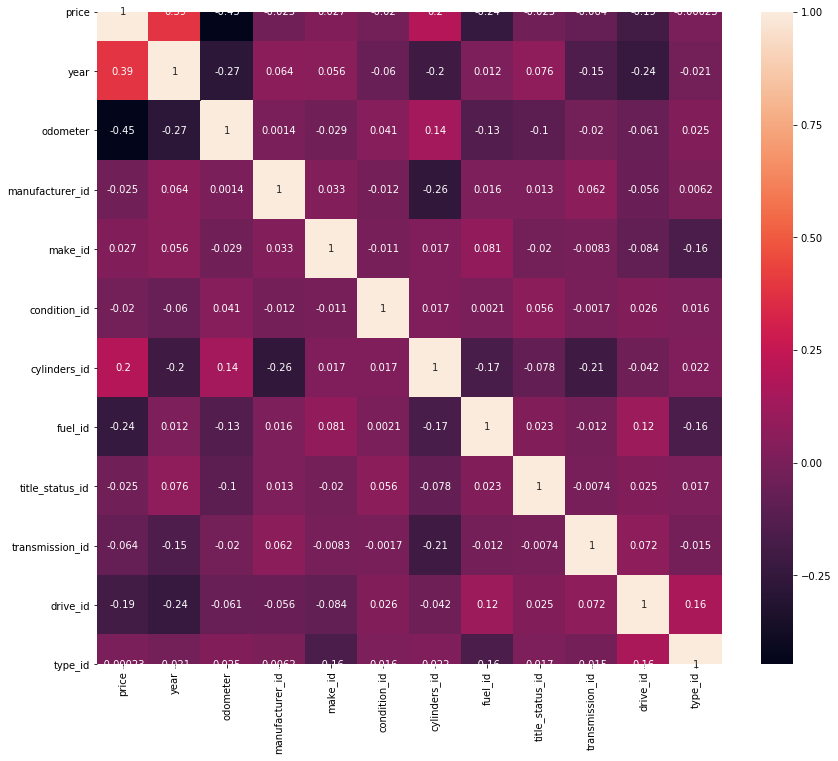

In [22]:
#See correlation matrix
data4 = data3.copy()
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(data4.corr(), annot=True)

# Feature Selection

In [23]:
# Import SelectKBest and Chisquare from Scikit Learn feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data4.drop(['price'],axis=1)
y = data4['price']

# Leverage SelectKBest class to extract the top 9 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
autos_dfscores = pd.DataFrame(fit.scores_)
autos_dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([autos_dfcolumns,autos_dfscores],axis=1)
featureScores.columns = ['Features','Score'] 

# Display the 5 best features 
print(featureScores.nlargest(5,'Score'))

           Features         Score
1          odometer  3.593559e+09
3           make_id  7.567791e+07
2   manufacturer_id  1.323840e+05
10          type_id  6.505574e+04
7   title_status_id  4.647452e+04


# Training

## Linear regression

In [24]:
X = data4.drop(['price','cylinders_id','drive_id','transmission_id','condition_id','title_status_id'], axis=1)
y = data4['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [25]:
# Create an instance of Linear Regression model 
Linear_Regressor = linear_model.LinearRegression()

# Train the training data to Linear Regressio
Linear_Regressor.fit(x_train, y_train)
Linear_Regressor.score(x_test,y_test)

0.36683643580638853

Text(0.5, 1, 'Linear Regression Scatterplot')

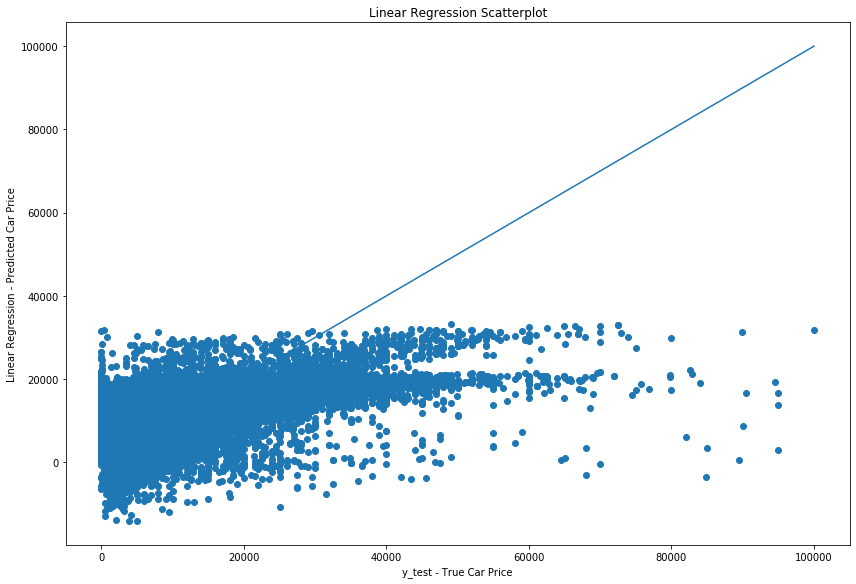

In [26]:
Linear_Regressor_pred = Linear_Regressor.predict(x_test)
plt.figure(figsize=(12,8))
plt.scatter(y_test, Linear_Regressor_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Linear Regression - Predicted Car Price')
plt.plot([y_test.min(), y_test.max()],[ y_test.min(), y_test.max()])
plt.tight_layout()
plt.title('Linear Regression Scatterplot')

## Decision Tree Regression

In [27]:
# Create Decision Tree Regressor instance 
Tree_Regressor = DecisionTreeRegressor(random_state=42)
Tree_Regressor.fit(x_train, y_train)
Tree_Regressor.score(x_test,y_test)

0.7712804867313384

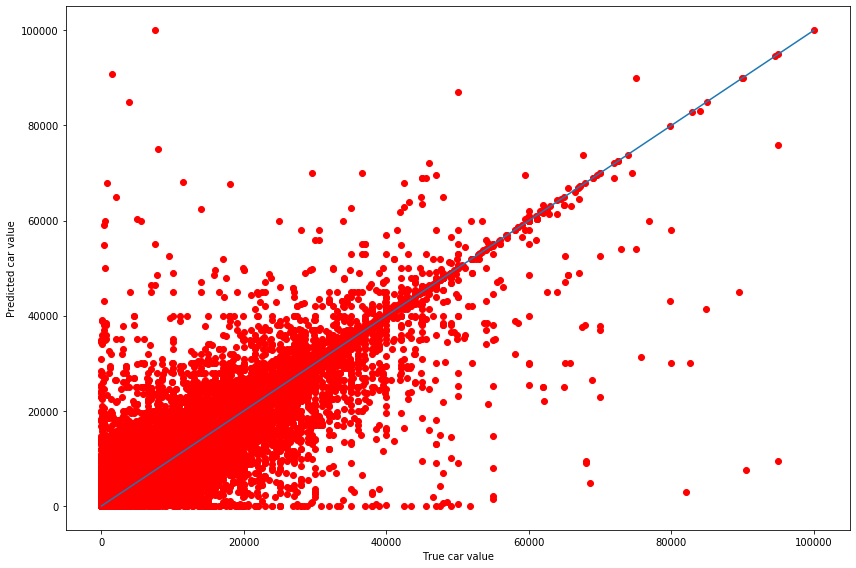

In [28]:
Tree_Regressor_pred = Tree_Regressor.predict(x_test)
plt.figure(figsize=(12,8))
plt.scatter(y_test, Tree_Regressor_pred, color = 'red')
plt.xlabel('True car value')
plt.ylabel('Predicted car value')
plt.plot([y_test.min(), y_test.max()],[ y_test.min(), y_test.max()])
plt.tight_layout()
plt.show()